# # Import required Libraries & Dataset


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd. set_option("display.max_columns", None) 

In [2]:
train=pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/train.csv')
test=pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/test.csv') 

In [3]:
train.shape

(891, 12)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# # Dropping features.

In [7]:
# Cabin has 687 missing values out of 891.
# PassengerId and Ticket dont give any information about the passenger.

train = train.drop(['Cabin','Ticket', 'PassengerId'],axis = 1)

# # Creating new features.

### Creating feature - 'SocialStatus' from 'Name'

In [8]:
train[['LastName', 'FirstName']]=train.Name.str.split(",",expand=True)

In [9]:
train.FirstName=train.FirstName.str.lstrip()

In [10]:
train[['Title', 'FName']]=train.FirstName.str.split(' ', 1, expand=True)

In [11]:
train = train.drop(['FirstName','Name','LastName', 'FName'],axis = 1)

In [12]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [13]:
# Replacing French titles for english.

train.Title = train.Title.replace('Mme.','Mrs.')
train.Title = train.Title.replace('Mlle.','Miss.')

In [14]:
train.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Ms.',
       'Major.', 'Lady.', 'Sir.', 'Col.', 'Capt.', 'the', 'Jonkheer.'],
      dtype=object)

In [15]:
status = {'Mr.': 'M', 'Mrs.': 'W', 'Miss.': 'W', 'Master.': 'W', 
          'Don.': 'Noble', 'Rev.': 'Officer', 'Dr.': 'Officer', 'Ms.': 'W', 
          'Major.': 'Officer', 'Lady.': 'Noble', 'Sir.': 'Noble', 'Col.': 'Officer', 
          'Capt.': 'Officer', 'the': 'Noble', 'Jonkheer.': 'Noble' }

In [16]:
train['SocialStatus'] = train.Title.map(status)

### Creating feature - 'Died' from 'Survived'

In [17]:
train['Died'] = train['Survived']
train.Died = train.Survived.map({0:1, 1:0})


In [18]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
0,0,3,male,22.0,1,0,7.2500,S,Mr.,M,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,W,0
2,1,3,female,26.0,0,0,7.9250,S,Miss.,W,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,W,0
4,0,3,male,35.0,0,0,8.0500,S,Mr.,M,1


# # Replacing/ removing NaN's

In [19]:
train.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age             177
SibSp             0
Parch             0
Fare              0
Embarked          2
Title             0
SocialStatus      0
Died              0
dtype: int64

### Filling age with medium age of passenger with same title.

In [20]:
df=train[train.Age.isnull()]

In [21]:
df=df[['Age','Title']]

In [22]:
df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Dr.'], dtype=object)

In [23]:
train[['Age', 'Title']].groupby('Title').median()

,Age
Title,
Capt.,70.0
Col.,58.0
Don.,40.0
Dr.,46.5
Jonkheer.,38.0
Lady.,48.0
Major.,48.5
Master.,3.5
Miss.,21.0


In [24]:
train.loc[(train.Age.isnull()) & (train.Title=='Mr.'),'Age']= 30.0
train.loc[(train.Age.isnull()) & (train.Title=='Mrs.'),'Age']= 35.0
train.loc[(train.Age.isnull()) & (train.Title=='Miss.'),'Age']= 21.0
train.loc[(train.Age.isnull()) & (train.Title=='Master.'),'Age']= 3.5
train.loc[(train.Age.isnull()) & (train.Title=='Dr.'),'Age']= 46.5

In [25]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        2
Title           0
SocialStatus    0
Died            0
dtype: int64

### Dropping 2 rows with empty 'Embarked' values.

In [26]:
train = train.dropna()

In [27]:
train.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age             0
SibSp           0
Parch           0
Fare            0
Embarked        0
Title           0
SocialStatus    0
Died            0
dtype: int64

# # Exploratory Data Analysis

In [28]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
0,0,3,male,22.0,1,0,7.2500,S,Mr.,M,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,W,0
2,1,3,female,26.0,0,0,7.9250,S,Miss.,W,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,W,0
4,0,3,male,35.0,0,0,8.0500,S,Mr.,M,1


### Categorical Features - 

<AxesSubplot:xlabel='Sex'>

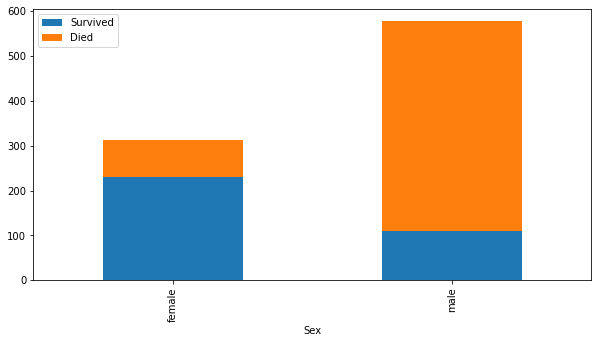

In [29]:
train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',
                                                           figsize=(10, 5),
                                                           stacked=True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Pclass'>

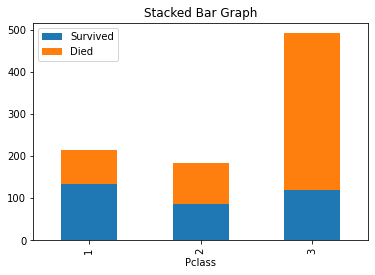

In [30]:
train.groupby('Pclass').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='SocialStatus'>

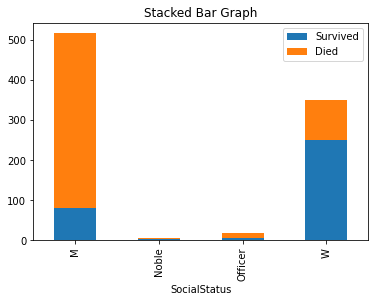

In [31]:
train.groupby('SocialStatus').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Embarked'>

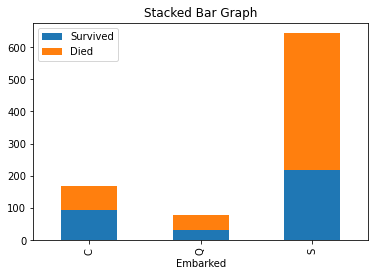

In [32]:
train.groupby('Embarked').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Parch'>

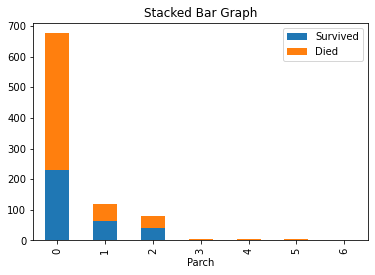

In [33]:
train.groupby('Parch').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

### Categorizing Parch as 0 = no, 1&2 = yes & >3 = many

In [34]:
train.Parch = train.Parch.map(lambda x: 'no' if x==0 else ('yes' if x<3 else 'many'))

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Parch'>

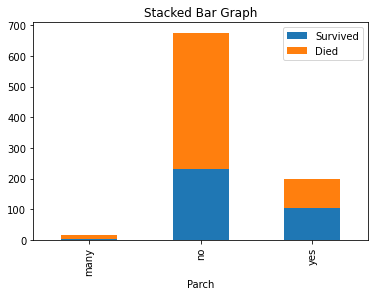

In [35]:
train.groupby('Parch').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='SibSp'>

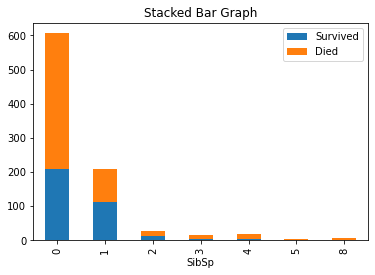

In [36]:
train.groupby('SibSp').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

### Categorizing Sibsp as 0 = no, 1&2 = yes & >3 = many

In [37]:
train.SibSp = train.SibSp.map(lambda x: 'no' if x==0 else ('yes' if x<3 else 'many'))

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='SibSp'>

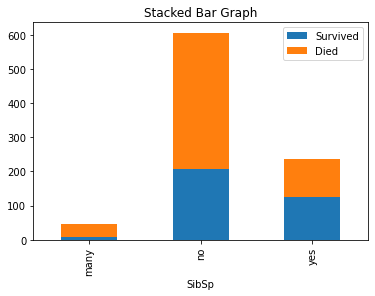

In [38]:
train.groupby('SibSp').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [39]:
train.Fare.describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

### Replacing passengers with 0 fare to mean fare of their passenger class.

In [40]:
train[train.Fare==0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
179,0,3,male,36.0,no,no,0.0,S,Mr.,M,1
263,0,1,male,40.0,no,no,0.0,S,Mr.,M,1
271,1,3,male,25.0,no,no,0.0,S,Mr.,M,0
277,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
302,0,3,male,19.0,no,no,0.0,S,Mr.,M,1
413,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
466,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
481,0,2,male,30.0,no,no,0.0,S,Mr.,M,1
597,0,3,male,49.0,no,no,0.0,S,Mr.,M,1
633,0,1,male,30.0,no,no,0.0,S,Mr.,M,1


In [41]:
train.groupby('Pclass')['Fare'].mean()

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [42]:
train.loc[(train.Fare == 0) & (train.Pclass == 1), 'Fare'] = 84.2
train.loc[(train.Fare == 0) & (train.Pclass == 2), 'Fare'] = 20.6
train.loc[(train.Fare == 0) & (train.Pclass == 3), 'Fare'] = 13.7

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

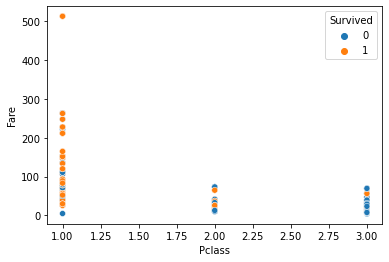

In [43]:
sns.scatterplot(x=train.Pclass, y=train.Fare, hue = train.Survived)

In [44]:
train.Fare.corr(train.Survived)

0.24525388460276387

In [45]:
#Normalizie Fare
train.Fare = (train.Fare-min(train.Fare))/(max(train.Fare)-min(train.Fare))

In [46]:
a = train.Age.sort_values()
a.unique()

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  3.5 ,
        4.  ,  5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  ,
       13.  , 14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  ,
       20.5 , 21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  ,
       27.  , 28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 ,
       33.  , 34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  ,
       40.  , 40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  ,
       46.5 , 47.  , 48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  ,
       55.  , 55.5 , 56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  ,
       63.  , 64.  , 65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [47]:
# Creating categories for age

In [48]:
train.loc[(train.Age > 0) & (train.Age < 1), 'Age'] = 0
train.loc[(train.Age >= 1) & (train.Age < 16), 'Age'] = 1
train.loc[(train.Age >= 16) & (train.Age < 35), 'Age'] = 2
train.loc[(train.Age >= 35) & (train.Age < 55), 'Age'] = 3
train.loc[(train.Age >= 55), 'Age'] = 4

<AxesSubplot:title={'center':'Stacked Bar Graph'}, xlabel='Age'>

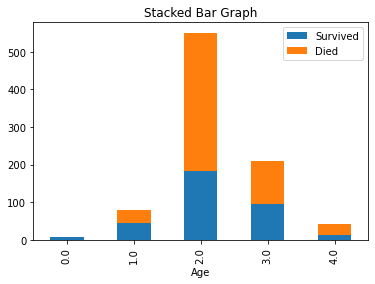

In [49]:
train.groupby('Age').agg('sum')[['Survived','Died']].plot(
    kind = 'bar',
    stacked = True,
    title = 'Stacked Bar Graph',
    mark_right = True)

In [50]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,SocialStatus,Died
0,0,3,male,2.0,yes,no,0.006369,S,Mr.,M,1
1,1,1,female,3.0,yes,no,0.132340,C,Mrs.,W,0
2,1,3,female,2.0,no,no,0.007697,S,Miss.,W,0
3,1,1,female,3.0,yes,no,0.096569,S,Mrs.,W,0
4,0,3,male,3.0,no,no,0.007943,S,Mr.,M,1


In [51]:
# Dropping Title column as Title and SocialStatus give the same information.
# Dropping Died column as Died and Survived give the same information.

train = train.drop(['Title', 'Died'],axis=1)

In [52]:
train.corr()

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.335549,-0.051861,0.245254
Pclass,-0.335549,1.000000,-0.347152,-0.563222
Age,-0.051861,-0.347152,1.000000,0.139315
Fare,0.245254,-0.563222,0.139315,1.000000


In [53]:
# As Fare & Pclass have strong corelation. Drop Fare.
train = train.drop('Fare',axis=1)

In [54]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,SocialStatus
0,0,3,male,2.0,yes,no,S,M
1,1,1,female,3.0,yes,no,C,W
2,1,3,female,2.0,no,no,S,W
3,1,1,female,3.0,yes,no,S,W
4,0,3,male,3.0,no,no,S,M


### Converting categorical features to numerical features.

In [55]:
print(train.Sex.unique())
print(train.Embarked.unique())
print(train.SocialStatus.unique())

['male' 'female']
['S' 'C' 'Q']
['M' 'W' 'Noble' 'Officer']


train.Sex = train.Sex.map({'male' : 0, 'female': 1})
train.Embarked = train.Embarked.map({'S' : 0, 'C': 1, 'Q':2})
train.SocialStatus = train.SocialStatus.map({'Ord': 0, 'Officer' : 1, 'Noble': 2})
train.Title = train.Title.map({'Mr.':0, 'Mrs.':1, 'Miss.':2, 'Master.':3, 'Don.':4, 
                               'Rev.':5, 'Dr.':6, 'Ms.':7, 'Major.':8, 'Lady.':9,
                               'Sir.':10, 'Col.':11, 'Capt.':12, 'the':13, 'Jonkheer.':14})

# # Model

In [56]:
from sklearn.model_selection import train_test_split
#X = train.copy().drop(['Survived'], axis=1)
X= train[['Sex','SocialStatus','Pclass','SibSp', 'Parch', 'Age']]
#X = pd.get_dummies(X)
y = train.Survived

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 1)

from sklearn.preprocessing import OneHotEncoder

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(X_train)    # Assume for simplicity all features are categorical.

# Apply the encoder.
X_train = encoder.transform(X_train)
X_val = encoder.transform(X_val)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

Y_pred = model.predict(X_val)
accuracy_score(y_val, Y_pred)

0.8654708520179372

# Training the model on whole train set.

In [57]:
encoder.fit(X)
X = encoder.transform(X)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

# Cleaning test set.

In [59]:
test=pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/test.csv') 
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
test[['LastName', 'FirstName']]= test.Name.str.split(",",expand=True)

test.FirstName=test.FirstName.str.lstrip()

test[['Title', 'FName']]=test.FirstName.str.split(' ', 1, expand=True)

test = test.drop(['FirstName','Name','LastName', 'FName'],axis = 1)

test.Title.unique()

# Replacing French titles for english.

test.Title = test.Title.replace('Mme.','Mrs.')
test.Title = test.Title.replace('Mlle.','Miss.')

test.Title.unique()

status = {'Mr.': 'M', 'Mrs.': 'W', 'Miss.': 'W', 'Master.': 'W', 
          'Don.': 'Noble', 'Rev.': 'Officer', 'Dr.': 'Officer', 'Ms.': 'W', 
          'Major.': 'Officer', 'Lady.': 'Noble', 'Sir.': 'Noble', 'Col.': 'Officer', 
          'Capt.': 'Officer', 'the': 'Noble', 'Jonkheer.': 'Noble', 'Dona.' : 'Noble' }

test['SocialStatus'] = test.Title.map(status)

In [61]:
test.SocialStatus.unique()

array(['M', 'W', 'Officer', 'Noble'], dtype=object)

### Filling missing values in Age

In [62]:
df=test[test.Age.isnull()]
df=df[['Age','Title']]
df.Title.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Ms.', 'Master.'], dtype=object)

In [63]:
test[['Age', 'Title']].groupby('Title').median()

,Age
Title,
Col.,50.0
Dona.,39.0
Dr.,53.0
Master.,7.0
Miss.,22.0
Mr.,28.5
Mrs.,36.5
Ms.,NaN
Rev.,35.5


In [64]:
test.loc[(test.Age.isnull()) & (test.Title=='Mr.'),'Age']= 28.5
test.loc[(test.Age.isnull()) & (test.Title=='Mrs.'),'Age']= 36.5
test.loc[(test.Age.isnull()) & (test.Title=='Miss.'),'Age']= 22.0
test.loc[(test.Age.isnull()) & (test.Title=='Master.'),'Age']= 7.0
test.loc[(test.Age.isnull()) & (test.Title=='Ms.'),'Age']= 22.0

### Categorizing Age, Parch & SibSp

In [65]:
test.loc[(test.Age > 0) & (test.Age < 1), 'Age'] = 0
test.loc[(test.Age >= 1) & (test.Age < 16), 'Age'] = 1
test.loc[(test.Age >= 16) & (test.Age < 35), 'Age'] = 2
test.loc[(test.Age >= 35) & (test.Age < 55), 'Age'] = 3
test.loc[(test.Age >= 55), 'Age'] = 4

In [66]:
test.Parch = test.Parch.map(lambda x: 'no' if x==0 else ('yes' if x<3 else 'many'))

In [67]:
test.SibSp = test.SibSp.map(lambda x: 'no' if x==0 else ('yes' if x<3 else 'many'))

In [68]:
test = test[['Sex','SocialStatus','Pclass','SibSp', 'Parch', 'Age']]

In [69]:
test.isnull().sum()

Sex             0
SocialStatus    0
Pclass          0
SibSp           0
Parch           0
Age             0
dtype: int64

In [70]:
test = encoder.transform(test)
prediction = model.predict(test)

In [71]:
sample_submission = pd.read_csv('/Users/Nishchay/Python/5. Titanic/Data/gender_submission.csv')
submission = sample_submission
submission.Survived = prediction
#submission = submission.set_index('Id')
submission.head()
submission.to_csv('/Users/Nishchay/Python/5. Titanic/submission.csv', index = False)